In [1]:
%load_ext autoreload
%autoreload 2

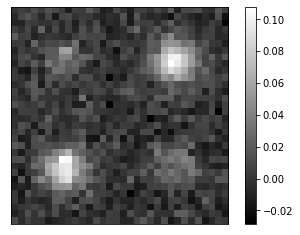

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def gkern(kernlen=21, nsig=3):
    import numpy
    import scipy.stats as st
    
    """Returns a 2D Gaussian kernel array."""
    
    interval = (2*nsig+1.)/(kernlen)
    x = numpy.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = numpy.diff(st.norm.cdf(x))
    kernel_raw = numpy.sqrt(numpy.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

## Simulate Data
np.random.seed(1)

N = 512 # number of subjects in a group
labels = np.zeros((N*2,))
labels[N:] = 1

# 2 confounding effects between 2 groups
cf = np.zeros((N*2,))
cf[:N] = np.random.uniform(1,4,size=N)
cf[N:] = np.random.uniform(3,6,size=N)

# 2 major effects between 2 groups
mf = np.zeros((N*2,))
mf[:N] = np.random.uniform(1,4,size=N)
mf[N:] = np.random.uniform(3,6,size=N)

# simulate images
x = np.zeros((N*2,32,32,1))
y = np.zeros((N*2,))
y[N:] = 1
for i in range(N*2):
    x[i,:16,:16,0] = gkern(kernlen=16, nsig=5)*mf[i]
    x[i,16:,:16,0] = gkern(kernlen=16, nsig=5)*cf[i]
    x[i,:16,16:,0] = gkern(kernlen=16, nsig=5)*cf[i]
    x[i,16:,16:,0] = gkern(kernlen=16, nsig=5)*mf[i]
    x[i] = x[i] + np.random.normal(0,0.01,size=(32,32,1))

plt.imshow(x[1,:,:,0],cmap='gray')
plt.colorbar()
#plt.title("a synthetic training image");
plt.xticks(np.arange(0), ())
plt.yticks(np.arange(0), ())
plt.savefig('synthetic_sample.jpg', format='jpg', dpi=300)

iter = 0 , acc = 0.5
Iter: 0, D: 2.047, G:0.725
loss:  0.7249953746795654

iter = 1 , acc = 0.5
iter = 2 , acc = 0.5
iter = 3 , acc = 0.5
iter = 4 , acc = 0.5
iter = 5 , acc = 0.5
iter = 6 , acc = 0.5
iter = 7 , acc = 0.5
iter = 8 , acc = 0.5
iter = 9 , acc = 0.5
iter = 10 , acc = 0.5
iter = 11 , acc = 0.5
iter = 12 , acc = 0.5
iter = 13 , acc = 0.5
iter = 14 , acc = 0.5
iter = 15 , acc = 0.5
iter = 16 , acc = 0.5
iter = 17 , acc = 0.5
iter = 18 , acc = 0.5
iter = 19 , acc = 0.5
iter = 20 , acc = 0.5
iter = 21 , acc = 0.5
iter = 22 , acc = 0.5
iter = 23 , acc = 0.5
iter = 24 , acc = 0.6494140625
iter = 25 , acc = 0.93798828125
iter = 26 , acc = 0.87939453125
iter = 27 , acc = 0.7158203125
iter = 28 , acc = 0.529296875
iter = 29 , acc = 0.5126953125
iter = 30 , acc = 0.51025390625
iter = 31 , acc = 0.5029296875
iter = 32 , acc = 0.52197265625
iter = 33 , acc = 0.513671875
iter = 34 , acc = 0.5
iter = 35 , acc = 0.5
iter = 36 , acc = 0.5
iter = 37 , acc = 0.5
iter = 38 , acc = 0.5
iter =

iter = 274 , acc = 0.85986328125
iter = 275 , acc = 0.8681640625
iter = 276 , acc = 0.88671875
iter = 277 , acc = 0.77587890625
iter = 278 , acc = 0.7109375
iter = 279 , acc = 0.7509765625
iter = 280 , acc = 0.75927734375
iter = 281 , acc = 0.81396484375
iter = 282 , acc = 0.833984375
iter = 283 , acc = 0.8125
iter = 284 , acc = 0.86572265625
iter = 285 , acc = 0.8291015625
iter = 286 , acc = 0.8935546875
iter = 287 , acc = 0.88916015625
iter = 288 , acc = 0.82177734375
iter = 289 , acc = 0.857421875
iter = 290 , acc = 0.759765625
iter = 291 , acc = 0.7900390625
iter = 292 , acc = 0.7001953125
iter = 293 , acc = 0.7724609375
iter = 294 , acc = 0.82958984375
iter = 295 , acc = 0.7890625
iter = 296 , acc = 0.7626953125
iter = 297 , acc = 0.6962890625
iter = 298 , acc = 0.82421875
iter = 299 , acc = 0.88134765625
iter = 300 , acc = 0.794921875
Iter: 300, D: 2.102, G:0.6702
loss:  0.6119710803031921

iter = 301 , acc = 0.86376953125
iter = 302 , acc = 0.7021484375
iter = 303 , acc = 0.7719

iter = 522 , acc = 0.87451171875
iter = 523 , acc = 0.9248046875
iter = 524 , acc = 0.91650390625
iter = 525 , acc = 0.89404296875
iter = 526 , acc = 0.90234375
iter = 527 , acc = 0.84521484375
iter = 528 , acc = 0.92529296875
iter = 529 , acc = 0.8837890625
iter = 530 , acc = 0.865234375
iter = 531 , acc = 0.9140625
iter = 532 , acc = 0.8544921875
iter = 533 , acc = 0.9033203125
iter = 534 , acc = 0.89306640625
iter = 535 , acc = 0.92333984375
iter = 536 , acc = 0.9033203125
iter = 537 , acc = 0.8955078125
iter = 538 , acc = 0.87353515625
iter = 539 , acc = 0.908203125
iter = 540 , acc = 0.93408203125
iter = 541 , acc = 0.833984375
iter = 542 , acc = 0.89404296875
iter = 543 , acc = 0.93115234375
iter = 544 , acc = 0.9296875
iter = 545 , acc = 0.80029296875
iter = 546 , acc = 0.935546875
iter = 547 , acc = 0.91259765625
iter = 548 , acc = 0.90869140625
iter = 549 , acc = 0.91650390625
iter = 550 , acc = 0.9052734375
Iter: 550, D: 2.23, G:0.5312
loss:  0.5035929083824158

iter = 551 , 

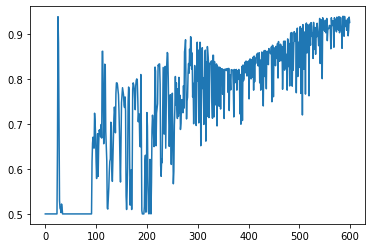

In [3]:
from datasets.toy_data import ToyData
from nma_gan import get_optimizer, discriminator2v, discriminator3v
from nma_gan import encoder, discriminator_loss, generator_loss, run_v_gan
from torch import nn
from torch.utils.data import DataLoader

device="cuda"
batch = 512
D2 = discriminator2v(v_len=10).to(device)
D3 = discriminator3v(v_len=10).to(device)

ENC = encoder(final_activation="none").to(device)
FF = nn.Linear(10, 1).to(device)

data_train = ToyData(device=device, N=1024)
loader_train = DataLoader(data_train, batch_size=batch,
                          shuffle=True, drop_last=True)

D_solver = get_optimizer(nn.ModuleList([D2, D3]))
G_solver = get_optimizer(nn.ModuleList([ENC, FF]))

D2, D3, ENC, FF = run_v_gan(loader_train, D2, D3, ENC, FF, D_solver, G_solver, discriminator_loss, 
                      device, batch_size=batch, show_every=50, num_epochs=150, l=25, acc_data=data_train)

In [36]:
l = 13
r = 300
while l < r:
    m = int((l + r) / 2)
    print(m)

    D2 = discriminator2v(v_len=10).to(device)
    D3 = discriminator3v(v_len=10).to(device)

    ENC = encoder(final_activation="none").to(device)
    FF = nn.Linear(10, 1).to(device)
    D_solver = get_optimizer(nn.ModuleList([D2, D3]))
    G_solver = get_optimizer(nn.ModuleList([ENC, FF]))

    data_train = ToyData(device=device, N=1024)
    loader_train = DataLoader(data_train, batch_size=batch,
                              shuffle=True, drop_last=True)
    
    D2, D3, ENC, FF = run_v_gan(loader_train, D2, D3, ENC, FF, D_solver, G_solver, discriminator_loss, 
                      device, batch_size=batch, show_every=50, num_epochs=50, l=m)
    features = ENC(data_train.x.view(-1, 1, 32, 32)).squeeze()
    y_preds = FF(features).squeeze()
    y_preds = (torch.sign(y_preds) + 1) / 2
    train_acc = (torch.sum(y_preds == data_train.y) / len(data_train)).item()
    print("l =", m, ", acc =", train_acc)
    if train_acc < 0.81:
        r = m
    elif train_acc > 0.84:
        l = m + 1
    else:
        break
print("best l:", r, "-", l)

156
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.087, G:0.6843
loss:  0.6805804371833801

Iter: 100, D: 2.075, G:0.6913
loss:  0.6759495735168457

Iter: 150, D: 2.076, G:0.7253
loss:  0.6604496240615845

l = 156 , acc = 0.69384765625
84
Iter: 0, D: 2.083, G:0.69
loss:  0.6899754405021667

Iter: 50, D: 2.088, G:0.681
loss:  0.6784728765487671

Iter: 100, D: 2.079, G:0.6867
loss:  0.6721522808074951

Iter: 150, D: 2.049, G:0.7338
loss:  0.7018035650253296

l = 84 , acc = 0.68798828125
48
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.089, G:0.6782
loss:  0.6760488748550415

Iter: 100, D: 2.087, G:0.6721
loss:  0.6714707016944885

Iter: 150, D: 2.102, G:0.649
loss:  0.6488672494888306

l = 48 , acc = 0.6826171875
30
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.089, G:0.6756
loss:  0.6735631823539734

Iter: 100, D: 2.082, G:0.6818
loss:  0.6662021279335022

Iter: 150, D: 2.109, G:0.6416
loss:  0.6358941793441772

l = 30 , acc

1
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.087, G:0.6696
loss:  0.6693074703216553

Iter: 100, D: 2.228, G:0.457
loss:  0.449593722820282

Iter: 150, D: 2.403, G:0.2506
loss:  0.2441015988588333

l = 1 , acc = 0.93505859375
2
Iter: 0, D: 2.083, G:0.69
loss:  0.6899753212928772

Iter: 50, D: 2.089, G:0.6698
loss:  0.6693500876426697

Iter: 100, D: 2.205, G:0.5024
loss:  0.4908943176269531

Iter: 150, D: 2.38, G:0.3001
loss:  0.29049116373062134

l = 2 , acc = 0.93212890625
3
Iter: 0, D: 2.083, G:0.69
loss:  0.6899753212928772

Iter: 50, D: 2.088, G:0.6701
loss:  0.6694706678390503

Iter: 100, D: 2.147, G:0.5751
loss:  0.5646016597747803

Iter: 150, D: 2.277, G:0.4265
loss:  0.4196341633796692

l = 3 , acc = 0.9296875
4
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.089, G:0.6703
loss:  0.6695765852928162

Iter: 100, D: 2.144, G:0.5928
loss:  0.5830838680267334

Iter: 150, D: 2.237, G:0.4856
loss:  0.48268115520477295

l = 4 , acc = 0.921875


l = 33 , acc = 0.76416015625
34
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.09, G:0.6759
loss:  0.6738938093185425

Iter: 100, D: 2.08, G:0.6756
loss:  0.6692452430725098

Iter: 150, D: 2.091, G:0.6513
loss:  0.6503405570983887

l = 34 , acc = 0.759765625
35
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.09, G:0.676
loss:  0.6738988757133484

Iter: 100, D: 2.081, G:0.6703
loss:  0.6650169491767883

Iter: 150, D: 2.094, G:0.6607
loss:  0.6607140302658081

l = 35 , acc = 0.716796875
36
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.089, G:0.6767
loss:  0.6745437383651733

Iter: 100, D: 2.077, G:0.6845
loss:  0.6708499193191528

Iter: 150, D: 2.099, G:0.6551
loss:  0.6457599401473999

l = 36 , acc = 0.7900390625
37
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.089, G:0.6766
loss:  0.674561619758606

Iter: 100, D: 2.058, G:0.7017
loss:  0.6939438581466675

Iter: 150, D: 2.076, G:0.6877
loss:  0.659155011177

Iter: 150, D: 2.075, G:0.6858
loss:  0.6700069904327393

l = 66 , acc = 0.85986328125
67
Iter: 0, D: 2.083, G:0.69
loss:  0.6899754405021667

Iter: 50, D: 2.089, G:0.6797
loss:  0.6773319840431213

Iter: 100, D: 2.071, G:0.7089
loss:  0.6751381158828735

Iter: 150, D: 2.079, G:0.6699
loss:  0.6672950983047485

l = 67 , acc = 0.6787109375
68
Iter: 0, D: 2.083, G:0.69
loss:  0.6899754405021667

Iter: 50, D: 2.088, G:0.6802
loss:  0.6780619621276855

Iter: 100, D: 2.041, G:0.7368
loss:  0.7291501760482788

Iter: 150, D: 2.041, G:0.7108
loss:  0.7107332944869995

l = 68 , acc = 0.5703125
69
Iter: 0, D: 2.083, G:0.69
loss:  0.6899754405021667

Iter: 50, D: 2.089, G:0.6801
loss:  0.6776877641677856

Iter: 100, D: 2.081, G:0.6893
loss:  0.6722127795219421

Iter: 150, D: 2.078, G:0.7001
loss:  0.6613577604293823

l = 69 , acc = 0.62548828125
70
Iter: 0, D: 2.083, G:0.69
loss:  0.689975380897522

Iter: 50, D: 2.089, G:0.6799
loss:  0.6774535179138184

Iter: 100, D: 2.084, G:0.6806
loss:  0.6711

Iter: 50, D: 2.088, G:0.6823
loss:  0.6793017983436584

Iter: 100, D: 2.077, G:0.7118
loss:  0.6757214069366455

Iter: 150, D: 2.093, G:0.6734
loss:  0.6603349447250366

l = 99 , acc = 0.65478515625
100
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.088, G:0.6816
loss:  0.6789302229881287

Iter: 100, D: 2.051, G:0.726
loss:  0.709021806716919

Iter: 150, D: 1.904, G:0.8323
loss:  0.8320199847221375

l = 100 , acc = 0.5
101
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.088, G:0.6816
loss:  0.6791694164276123

Iter: 100, D: 2.062, G:0.7105
loss:  0.6977662444114685

Iter: 150, D: 2.079, G:0.7144
loss:  0.6614515781402588

l = 101 , acc = 0.75732421875
102
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.088, G:0.6814
loss:  0.6790132522583008

Iter: 100, D: 2.079, G:0.6997
loss:  0.6747468709945679

Iter: 150, D: 2.091, G:0.6659
loss:  0.6590986847877502

l = 102 , acc = 0.5
103
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068

Iter: 150, D: 2.082, G:0.6709
loss:  0.6707329750061035

l = 131 , acc = 0.5
132
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.087, G:0.6835
loss:  0.6801793575286865

Iter: 100, D: 2.075, G:0.6902
loss:  0.6783549785614014

Iter: 150, D: 2.083, G:0.7096
loss:  0.6624794006347656

l = 132 , acc = 0.5
133
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.087, G:0.684
loss:  0.6809895634651184

Iter: 100, D: 2.08, G:0.6791
loss:  0.6716030836105347

Iter: 150, D: 2.088, G:0.6854
loss:  0.6589450240135193

l = 133 , acc = 0.57373046875
134
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.087, G:0.6837
loss:  0.6800976991653442

Iter: 100, D: 2.081, G:0.6873
loss:  0.6720321178436279

Iter: 150, D: 2.082, G:0.669
loss:  0.6689251661300659

l = 134 , acc = 0.7421875
135
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.087, G:0.683
loss:  0.6799883842468262

Iter: 100, D: 2.074, G:0.722
loss:  0.6762933731079102

I

164
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755597114563

Iter: 50, D: 2.087, G:0.6852
loss:  0.6809983253479004

Iter: 100, D: 2.051, G:0.7298
loss:  0.7014126777648926

Iter: 150, D: 2.077, G:0.6709
loss:  0.6638710498809814

l = 164 , acc = 0.77587890625
165
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.086, G:0.6843
loss:  0.6810282468795776

Iter: 100, D: 2.077, G:0.6969
loss:  0.6820316314697266

Iter: 150, D: 2.079, G:0.704
loss:  0.6726272702217102

l = 165 , acc = 0.74072265625
166
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755597114563

Iter: 50, D: 2.086, G:0.685
loss:  0.6815214157104492

Iter: 100, D: 2.004, G:0.7712
loss:  0.7433165311813354

Iter: 150, D: 2.068, G:0.6709
loss:  0.6695543527603149

l = 166 , acc = 0.76953125
167
Iter: 0, D: 2.083, G:0.69
loss:  0.6899755001068115

Iter: 50, D: 2.085, G:0.6863
loss:  0.6818934679031372

Iter: 100, D: 2.069, G:0.7522
loss:  0.678769588470459

Iter: 150, D: 2.053, G:0.7323
loss:  0.6727741360664368

l = 167 

Iter: 100, D: 2.07, G:0.7288
loss:  0.6749265789985657

Iter: 150, D: 2.065, G:0.7798
loss:  0.6796151995658875

l = 196 , acc = 0.53515625
197
Iter: 0, D: 2.083, G:0.69
loss:  0.6899756193161011

Iter: 50, D: 2.085, G:0.6873
loss:  0.6823328733444214

Iter: 100, D: 2.052, G:0.7585
loss:  0.702265739440918

Iter: 150, D: 2.068, G:0.8948
loss:  0.6614073514938354

l = 197 , acc = 0.80517578125
198
Iter: 0, D: 2.083, G:0.69
loss:  0.6899756193161011

Iter: 50, D: 2.085, G:0.6868
loss:  0.6831669807434082

Iter: 100, D: 2.067, G:0.7365
loss:  0.6781154870986938

Iter: 150, D: 2.063, G:0.7868
loss:  0.6738046407699585

l = 198 , acc = 0.77880859375
199
Iter: 0, D: 2.083, G:0.69
loss:  0.6899756193161011

Iter: 50, D: 2.086, G:0.6864
loss:  0.6818926334381104

Iter: 100, D: 2.051, G:0.7408
loss:  0.6908128261566162

Iter: 150, D: 2.074, G:0.6795
loss:  0.6674700379371643

l = 199 , acc = 0.65380859375
200
Iter: 0, D: 2.083, G:0.69
loss:  0.6899756193161011

Iter: 50, D: 2.086, G:0.6855
loss

l = 228 , acc = 0.63232421875
229
Iter: 0, D: 2.083, G:0.69
loss:  0.6899756789207458

Iter: 50, D: 2.086, G:0.6867
loss:  0.6819058060646057

Iter: 100, D: 2.011, G:0.7837
loss:  0.7417240142822266

Iter: 150, D: 2.035, G:0.7849
loss:  0.6993529796600342

l = 229 , acc = 0.59912109375
230
Iter: 0, D: 2.083, G:0.69
loss:  0.6899756789207458

Iter: 50, D: 2.086, G:0.6868
loss:  0.6820725202560425

Iter: 100, D: 2.064, G:0.7615
loss:  0.6791383624076843

Iter: 150, D: 2.065, G:0.7233
loss:  0.672398567199707

l = 230 , acc = 0.50244140625
231
Iter: 0, D: 2.083, G:0.69
loss:  0.6899756789207458

Iter: 50, D: 2.085, G:0.6873
loss:  0.6823718547821045

Iter: 100, D: 2.046, G:0.7668
loss:  0.7045171856880188

Iter: 150, D: 2.057, G:0.6978
loss:  0.6880323886871338

l = 231 , acc = 0.5556640625
232
Iter: 0, D: 2.083, G:0.69
loss:  0.6899756789207458

Iter: 50, D: 2.086, G:0.6865
loss:  0.6820946931838989

Iter: 100, D: 2.069, G:0.7575
loss:  0.6810259222984314

Iter: 150, D: 2.065, G:0.7934
l

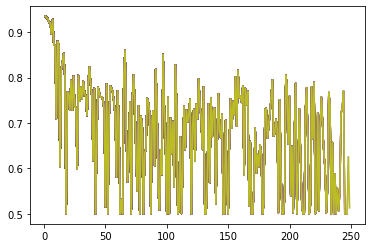

In [12]:
import torch
l = 1
r = 250
accs = []
for i in range(l, r):
    print(i)

    D2 = discriminator2v(v_len=10).to(device)
    D3 = discriminator3v(v_len=10).to(device)

    ENC = encoder(final_activation="none").to(device)
    FF = nn.Linear(10, 1).to(device)
    D_solver = get_optimizer(nn.ModuleList([D2, D3]))
    G_solver = get_optimizer(nn.ModuleList([ENC, FF]))

    data_train = ToyData(device=device, N=1024)
    loader_train = DataLoader(data_train, batch_size=batch,
                              shuffle=True, drop_last=True)
    
    D2, D3, ENC, FF = run_v_gan(loader_train, D2, D3, ENC, FF, D_solver, G_solver, discriminator_loss, 
                      device, batch_size=batch, show_every=50, num_epochs=50, l=i)
    features = ENC(data_train.x.view(-1, 1, 32, 32)).squeeze()
    y_preds = FF(features).squeeze()
    y_preds = (torch.sign(y_preds) + 1) / 2
    train_acc = (torch.sum(y_preds == data_train.y) / len(data_train)).item()
    print("l =", i, ", acc =", train_acc)
    accs.append(train_acc)
    plt.close()
    plt.plot(range(l, i+1), accs)
    plt.savefig("test.png")

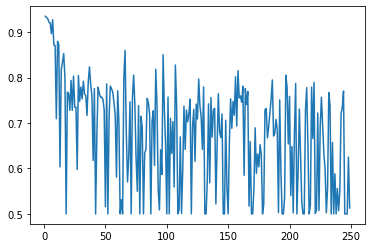

In [13]:
plt.close()
plt.plot(range(l, r), accs)
plt.savefig("accuraciesbyl_stratified.png")

In [37]:
import torch
features = ENC(data_train.x.view(-1, 1, 32, 32)).squeeze()
y_preds = FF(features).squeeze()
y_preds = (torch.sign(y_preds) + 1) / 2
train_acc = torch.sum(y_preds == data_train.y)
print("Accuracy:", (train_acc/len(data_train)).item())

Accuracy: 0.8271484375


Text(0, 0.5, 'sigma_A')

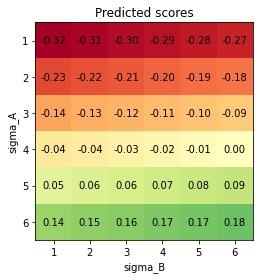

In [7]:
from datasets import toy_data
import torch
import matplotlib.pyplot as plt
import numpy as np
G = nn.Sequential(ENC, FF)
data = toy_data.full_toy_data(device=device)
# data += torch.normal(0, 0.01, size=(6, 6, 32, 32), device=device)
preds = G(data.view(-1, 1, 32, 32)).reshape(6, 6)
scale = max(torch.abs(torch.min(preds)), torch.abs(torch.max(preds)))
fig, ax = plt.subplots()
im = ax.imshow(preds.detach().cpu().numpy(), cmap="RdYlGn", vmin=-scale, vmax=scale)

ax.set_xticks(np.arange(preds.shape[1]), labels=np.arange(preds.shape[1]) + 1)
ax.set_yticks(np.arange(preds.shape[0]), labels=np.arange(preds.shape[0]) + 1)
for i in range(preds.shape[0]):
    for j in range(preds.shape[1]):
        text = ax.text(j, i, f"{preds[i, j]:0.2f}",
                       ha="center", va="center", color="k")
ax.set_title("Predicted scores")
ax.set_xlabel('sigma_B')
ax.set_ylabel('sigma_A')

In [49]:
print(f"sigma_A = {data_train.mf[2].item()}\nsigma_B = {data_train.cf[2].item()}")

sigma_A = 1.6351224184036255
sigma_B = 1.265432357788086


In [48]:
sample = torch.clone(data_train.x[2, 0, :, :])

In [50]:
# predicted label for sample (low sigma_A, low sigma_B)
G(sample.view(1, 1, 32, 32)).item()

-0.20508036017417908

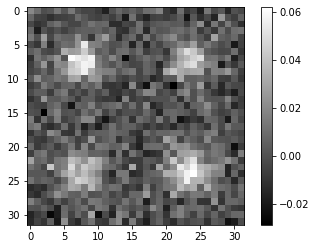

In [51]:
# visual representation of sample
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

In [117]:
# increase sigma_B (low sigma_A, high sigma_B)
sample[16:, :16] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 #+ torch.normal(0, 0.01, size=(16, 16))
sample[:16, 16:] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 #+ torch.normal(0, 0.01, size=(16, 16))

In [53]:
G(sample.view(1, 1, 32, 32)).item()

-0.028424113988876343

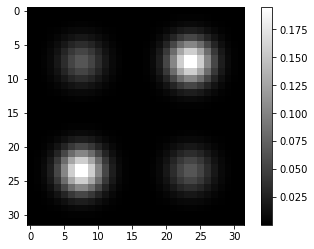

In [120]:
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

In [122]:
# now increase sigma_A (high sigma_A, high sigma_B)
sample[:16, :16] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 #+ torch.normal(0, 0.01, size=(16, 16))
sample[16:, 16:] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 #+ torch.normal(0, 0.01, size=(16, 16))

In [123]:
G(sample.view(1, 1, 32, 32)).item()

0.33552566170692444

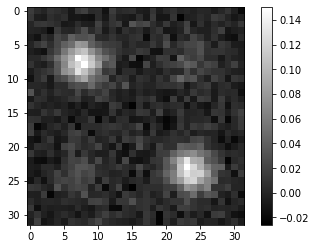

In [91]:
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

In [92]:
# decrease sigma_B (high sigma_A, low sigma_B)
sample[16:, :16] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 + torch.normal(0, 0.01, size=(16, 16))
sample[:16, 16:] = torch.from_numpy(gkern(kernlen=16, nsig=5)) * 6 + torch.normal(0, 0.01, size=(16, 16))

In [93]:
G(sample.view(1, 1, 32, 32)).item()

0.19597479701042175

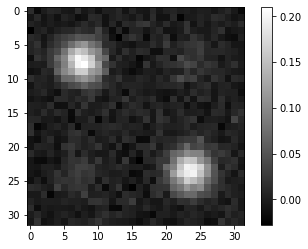

In [74]:
import matplotlib.pyplot as plt
plt.imshow(sample,cmap='gray')
plt.colorbar()

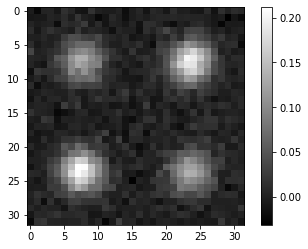

In [113]:
import matplotlib.pyplot as plt
plt.imshow(data[3, 5, :, :],cmap='gray')
plt.colorbar()

In [378]:
good_classifier = G